# Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing dataset

In [2]:
dataset_train = pd.read_csv('AMZNtrain.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [4]:
dataset_train.shape

(1258, 7)

In [5]:
training_set

array([[ 398.799988],
       [ 398.290009],
       [ 395.850006],
       ...,
       [1454.199951],
       [1473.349976],
       [1510.800049]])

# Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
training_set_scaled = sc.fit_transform(training_set)

# Creating timesteps

In [7]:
# Creating a data structure with 120 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping to 3D (batch_size, timesteps , input_dim)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building RNN

## Importing Keras Libraries

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.25))

In [11]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

In [12]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

In [13]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.25))

In [14]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.25))

In [15]:
regressor.add(Dense(units = 1))

In [16]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [18]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1138/1138 [==============================] - 31s 27ms/step - loss: 0.0141
Epoch 2/100
1138/1138 [==============================] - 35s 30ms/step - loss: 0.0155
Epoch 3/100
1138/1138 [==============================] - 27s 24ms/step - loss: 0.0152
Epoch 4/100
1138/1138 [==============================] - 29s 26ms/step - loss: 0.0130
Epoch 5/100
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0144
Epoch 6/100
1138/1138 [==============================] - 21s 18ms/step - loss: 0.0172
Epoch 7/100
1138/1138 [==============================] - 21s 19ms/step - loss: 0.0125
Epoch 8/100
1138/1138 [==============================] - 21s 18ms/step - loss: 0.0131
Epoch 9/100
1138/1138 [==============================] - 28s 25ms/step - loss: 0.0142
Epoch 10/100
1138/1138 [==============================] - 28s 24ms/step - loss: 0.0138
Epoch 11/100
1138/1138 [==============================] - 32s 28ms/step - loss: 0.0152
Epoch 12/100
1138/1138 [============================

1138/1138 [==============================] - 23s 20ms/step - loss: 0.0113
Epoch 96/100
1138/1138 [==============================] - 23s 20ms/step - loss: 0.0121
Epoch 97/100
1138/1138 [==============================] - 28s 25ms/step - loss: 0.0111
Epoch 98/100
1138/1138 [==============================] - 22s 20ms/step - loss: 0.0120
Epoch 99/100
1138/1138 [==============================] - 26s 22ms/step - loss: 0.0109
Epoch 100/100
1138/1138 [==============================] - 26s 23ms/step - loss: 0.0117


# Importing actual stock price of January 2019

In [20]:
dataset_test = pd.read_csv('AMZNtest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Predicted stock price of January 2019

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [22]:
predicted_stock_price.shape

(20, 1)

In [24]:
predicted_stock_price

array([[1543.8157],
       [1537.8475],
       [1550.6635],
       [1560.2854],
       [1598.3066],
       [1647.587 ],
       [1662.6749],
       [1657.3492],
       [1646.995 ],
       [1625.9836],
       [1621.1494],
       [1648.248 ],
       [1663.647 ],
       [1686.8508],
       [1682.3602],
       [1665.9707],
       [1648.339 ],
       [1656.8394],
       [1652.3792],
       [1646.0409]], dtype=float32)

# Visualizing the result

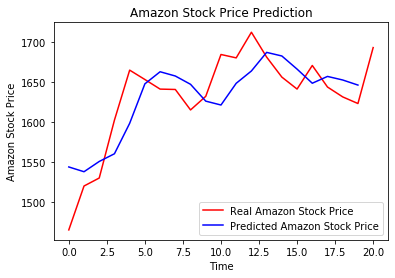

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Amazon Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Amazon Stock Price')
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.legend()
plt.show()